In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## 9.1 A Brief matplotlib API Primer

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = np.arange(10)
data


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

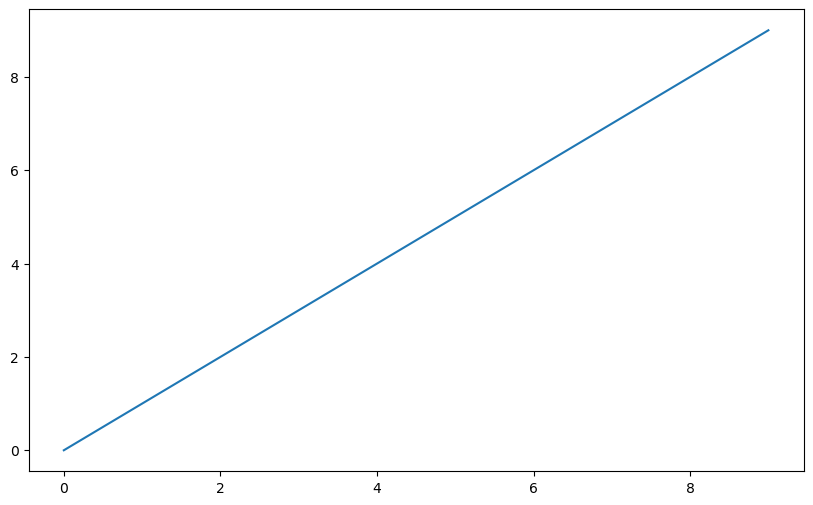

In [4]:
plt.plot(data);

### Figures and Subplots

Plots in matplotlib reside within a Figure object. You can create a new figure with `plt.figure`:

`plt.figure` has a number of options; notably, `figsize` will guarantee the figure has a certain size and aspect ratio if saved to disk.

You can’t make a plot with a blank figure. You have to create one or more subplots using `add_subplot`:

:::{.callout-tip}
One nuance of using Jupyter notebooks is that plots are reset after each cell is evaluated, so you must put all of the plotting commands in a single notebook cell.

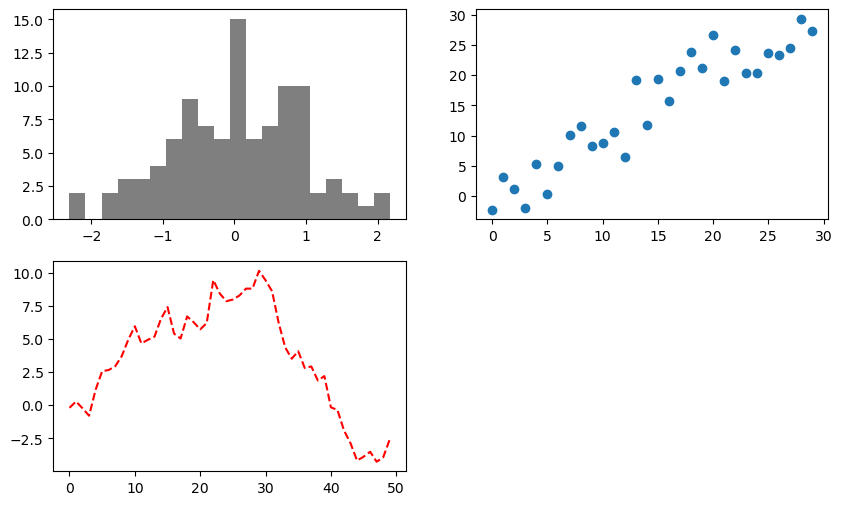

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(np.random.standard_normal(50).cumsum(), color="red",
         linestyle="dashed")
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.5); #0<= alpha <= 1. 
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));

These plot axis objects have various methods that create different types of plots, and it is preferred to use the axis methods over the top-level plotting functions like `plt.plot`.

In [6]:
plt.close("all") # close all open figures. 

To make creating a grid of subplots more convenient, matplotlib includes a `plt.subplots` method that creates a new figure and returns a NumPy array containing the created subplot objects. 

The axes array can then be indexed like a two-dimensional array; for example, `axes[0, 1]` refers to the subplot in the top row at the center. You can also indicate that subplots should have the same `x`- or `y`-axis using `sharex` and `sharey`, respectively. 

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

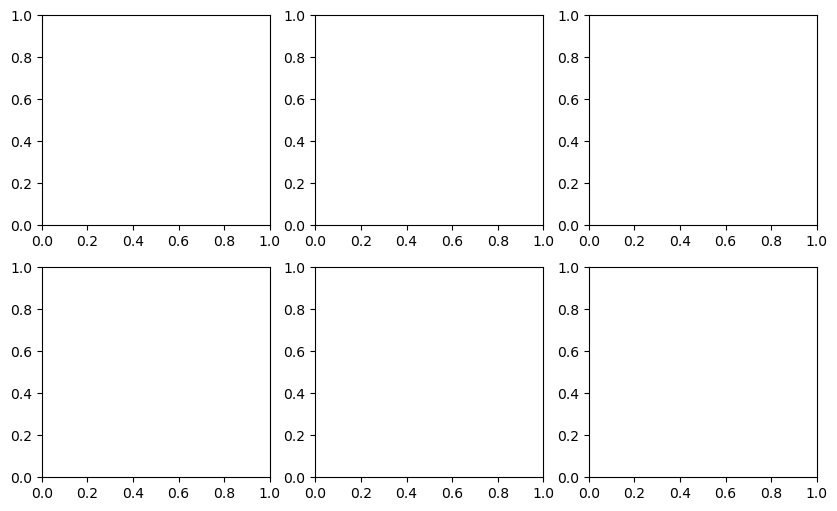

In [7]:
fig, axes = plt.subplots(2, 3)
axes

Table 9.1: matplotlib.pyplot.subplots options
Argument	|Description
|:----------|:------------------------------------------------------|
nrows|	Number of rows of subplots
ncols|	Number of columns of subplots
sharex	|All subplots should use the same x-axis ticks (adjusting the xlim will affect all subplots)
sharey	|All subplots should use the same y-axis ticks (adjusting the ylim will affect all subplots)
subplot_kw|	Dictionary of keywords passed to add_subplot call used to create each subplot
**fig_kw|	Additional keywords to subplots are used when creating the figure, such as plt.subplots(2, 2, figsize=(8, 6))

### Adjusting the spacing around subplots

You can change the spacing using the subplots_adjust method on Figure objects:
```
subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)
```
`left, right, bottom, top`: These parameters control the spacing of the subplots from the left, right, bottom, and top edges of the figure, respectively. They can be specified as a fraction of the figure width or height.

`wspace` and `hspace` control the percent of the figure width and figure height, respectively, to use as spacing between subplots.

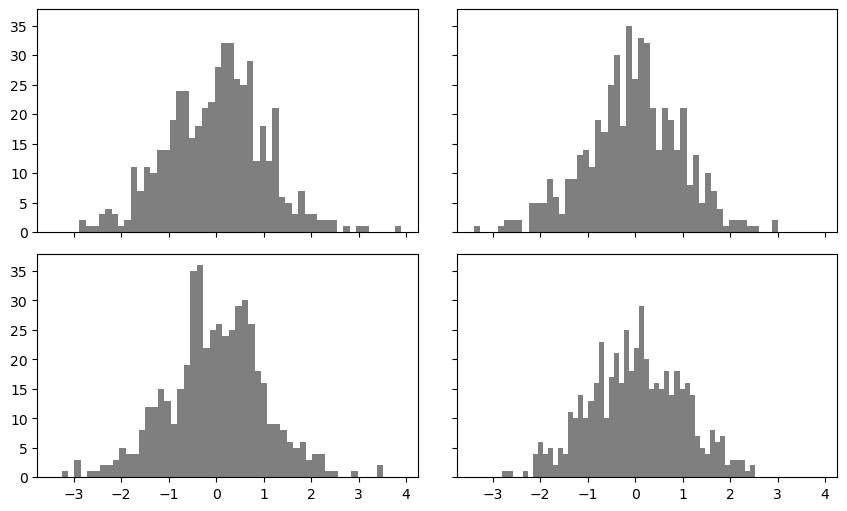

In [14]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)
fig.subplots_adjust(left=0.2, right=1, bottom=0.1, wspace=0.1, hspace=0.1)

### Colors, Markers, and Line Styles

```
ax.plot(x, y, linestyle="--", color="green")
```

A number of color names are provided for commonly used colors, but you can use any color on the spectrum by specifying its hex code (e.g., "#CECECE"). 

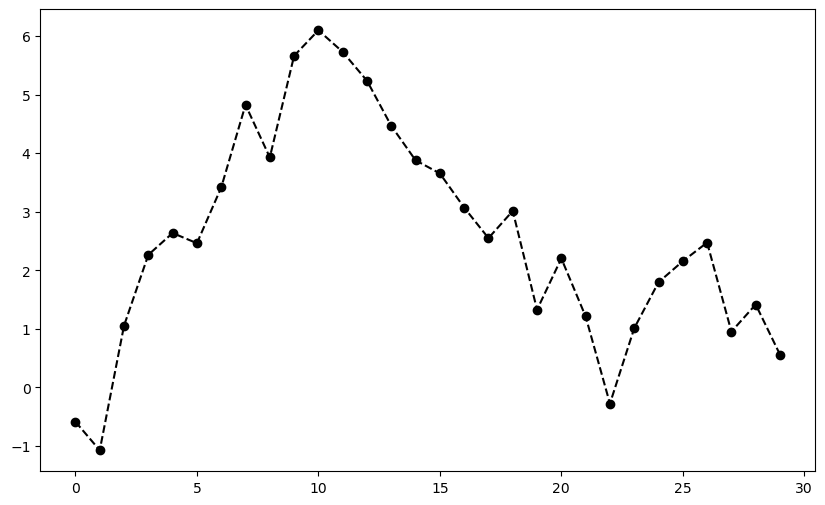

In [15]:
fig = plt.figure()

ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black",
        linestyle="dashed", marker="o");

In [10]:
plt.close("all")

For line plots, you will notice that subsequent points are linearly interpolated by default. This can be altered with the `drawstyle` option (see Line plot with different drawstyle options):

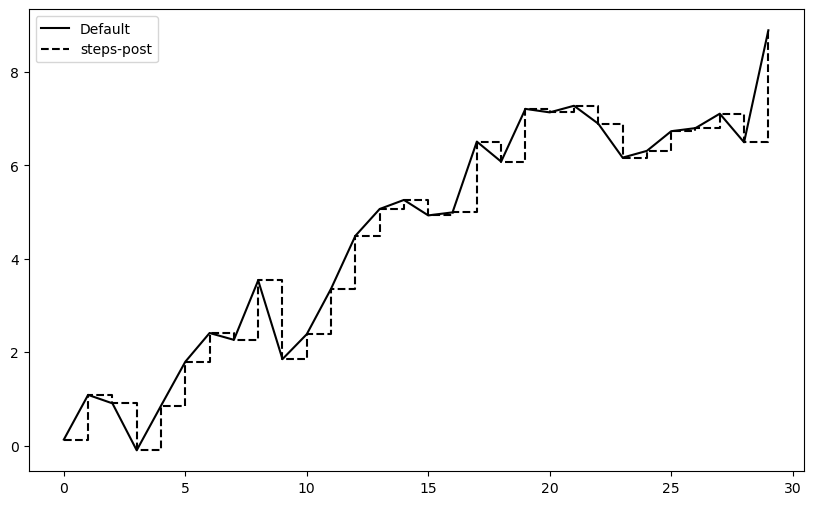

In [17]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="-", label="Default");
ax.plot(data, color="black", linestyle="dashed",
        drawstyle="steps-post", label="steps-post");
# steps-post: jumps after the point
# steps: (steps-pre); steps-mid;
ax.legend()

:::{.callout-tip}
You must call `ax.legend` to create the legend, whether or not you passed the label options when plotting the data.

### Ticks, Labels, and Legends
Most kinds of plot decorations can be accessed through methods on matplotlib axes objects. This includes methods like `xlim`, `xticks`, and `xticklabels`. These control the plot range, tick locations, and tick labels, respectively. They can be used in two ways:

Called with no arguments returns the current parameter value (e.g., `ax.xlim()` returns the current x-axis plotting range)

Called with parameters sets the parameter value (e.g., ax.xlim([0, 10]) sets the x-axis range to 0 to 10)

All such methods act on the active or most recently created AxesSubplot. Each corresponds to two methods on the subplot object itself; in the case of `xlim`, these are `ax.get_xlim` and `ax.set_xlim`.

Text(0.5, 1.0, 'My first matplotlib plot')

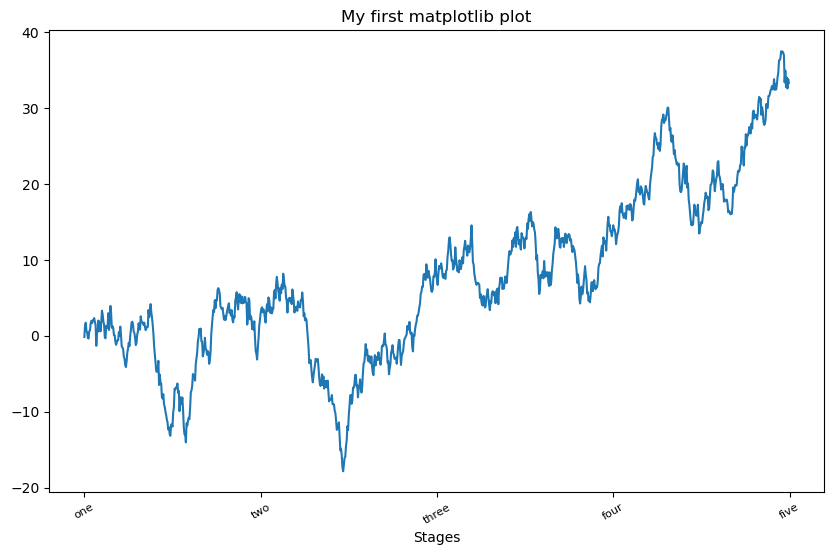

In [12]:
fig, ax = plt.subplots() # create one plot
ax.plot(np.random.standard_normal(1000).cumsum());
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation=30, fontsize=8)
ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot")


Modifying the y-axis consists of the same process, substituting y for x in this example. The axes class has a `set` method that allows batch setting of plot properties. From the prior example, we could also have written:
```
ax.set(title="My first matplotlib plot", xlabel="Stages")
```

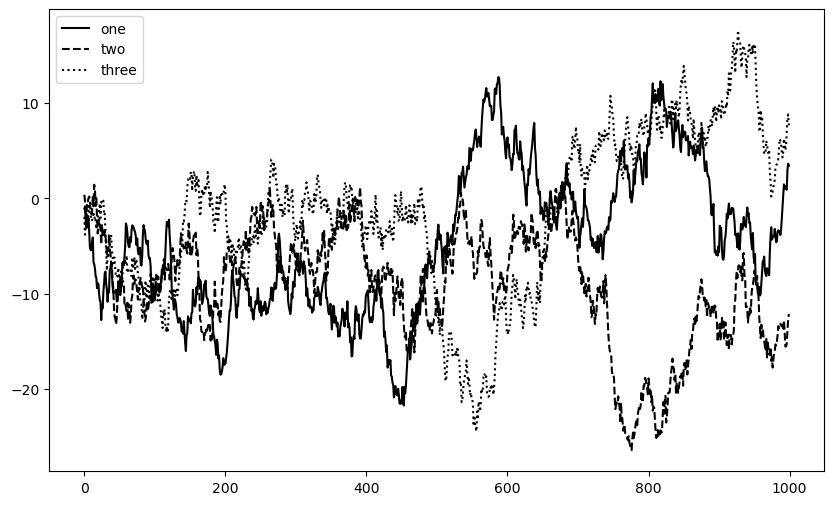

In [18]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed",
        label="two");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted",
        label="three");
ax.legend()

The legend method has several other choices for the location loc argument. See the docstring (with ax.legend?) for more information.

The `loc` legend option tells matplotlib where to place the plot. The default is "best", which tries to choose a location that is most out of the way. To exclude one or more elements from the legend, pass no label or `label="_nolegend_"`.

### Annotations and Drawing on a Subplot
In addition to the standard plot types, you may wish to draw your own plot annotations, which could consist of text, arrows, or other shapes. You can add annotations and text using the `text`, `arrow`, and `annotate` functions. text draws text at given coordinates (x, y) on the plot with optional custom styling:
```
ax.text(x, y, "Hello world!",
        family="monospace", fontsize=10)
`````


`asof` is a method that allows you to retrieve the value of the spx data at the specified date or the most recent date before the given date if the exact date is not available.

Text(0.5, 1.0, 'Important dates in the 2008–2009 financial crisis')

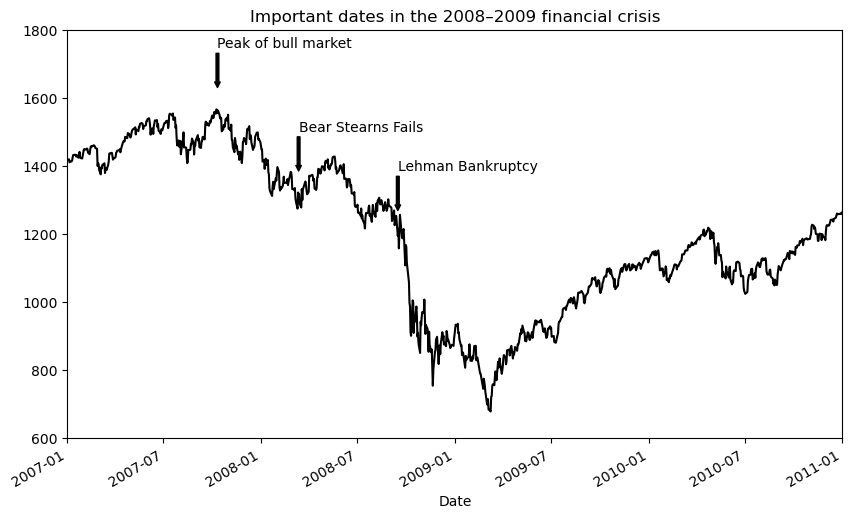

In [19]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("examples/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75), #to coordinates
                xytext=(date, spx.asof(date) + 225),#from coordinates
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008–2009 financial crisis")

In [15]:
spx

Date
1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 5472, dtype: float64

The `ax.annotate` method can draw labels at the indicated `x` and `y` coordinates. We use the `set_xlim` and `set_ylim` methods to manually set the start and end boundaries for the plot rather than using matplotlib's default. Lastly, `ax.set_title` adds a main title to the plot.



Drawing shapes requires some more care. matplotlib has objects that represent many common shapes, referred to as `patches`. Some of these, like `Rectangle` and `Circle`, are found in `matplotlib.pyplot`, but the full set is located in `matplotlib.patches`.

To add a shape to a plot, you create the patch object and add it to a subplot ax by passing the patch to `ax.add_patch` (see Data visualization composed from three different patches):

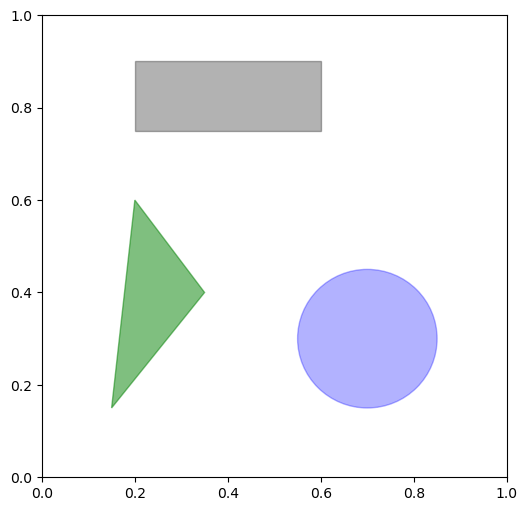

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.3), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [17]:
plt.close("all")

### Saving Plots to File
You can save the active figure to file using the figure object’s `savefig` instance method. For example, to save an SVG version of a figure, you need only type:
```
fig.savefig("figpath.svg")
```
The file type is inferred from the file extension. So if you used `.pdf` instead, you would get a PDF. One important option that I use frequently for publishing graphics is `dpi`, which controls the dots-per-inch resolution. To get the same plot as a PNG at 400 DPI, you would do:
```
fig.savefig("figpath.png", dpi=400)
```


Table 9.2: Some fig.savefig options
Argument|	Description
|:-----------|:-----------------------------------------------------|
fname|	String containing a filepath or a Python file-like object. The figure format is inferred from the file extension (e.g., .pdf for PDF or .png for PNG).
dpi|	The figure resolution in dots per inch; defaults to 100 in IPython or 72 in Jupyter out of the box but can be configured.
facecolor, edgecolor|	The color of the figure background outside of the subplots; "w" (white), by default.
format	|The explicit file format to use ("png", "pdf", "svg", "ps", "eps", ...).


### matplotlib Configuration
to set the global default figure size to be 10 × 10, you could enter:
```
plt.rc("figure", figsize=(10, 10))
```
All of the current configuration settings are found in the `plt.rcParams` dictionary, and they can be restored to their default values by calling the `plt.rcdefaults()` function.

The first argument to rc is the component you wish to customize, such as "figure", "axes", "xtick", "ytick", "grid", "legend", or many others. After that can follow a sequence of keyword arguments indicating the new parameters. A convenient way to write down the options in your program is as a dictionary:
```
plt.rc("font", family="monospace", weight="bold", size=8)
```
For more extensive customization and to see a list of all the options, matplotlib comes with a configuration file `matplotlibrc` in the matplotlib/mpl-data directory. If you customize this file and place it in your home directory titled ``.matplotlibrc`, it will be loaded each time you use matplotlib.

## 9.2 Plotting with pandas and seaborn
matplotlib can be a fairly low-level tool. You assemble a plot from its base components: the data display (i.e., the type of plot: line, bar, box, scatter, contour, etc.), legend, title, tick labels, and other annotations.

In pandas, we may have multiple columns of data, along with row and column labels. pandas itself has built-in methods that simplify creating visualizations from DataFrame and Series objects. Another library is seaborn, a high-level statistical graphics library built on matplotlib. seaborn simplifies creating many common visualization types.

### Line Plots
Series and DataFrame have a plot attribute for making some basic plot types. By default, `plot()` makes line plot:

<Axes: >

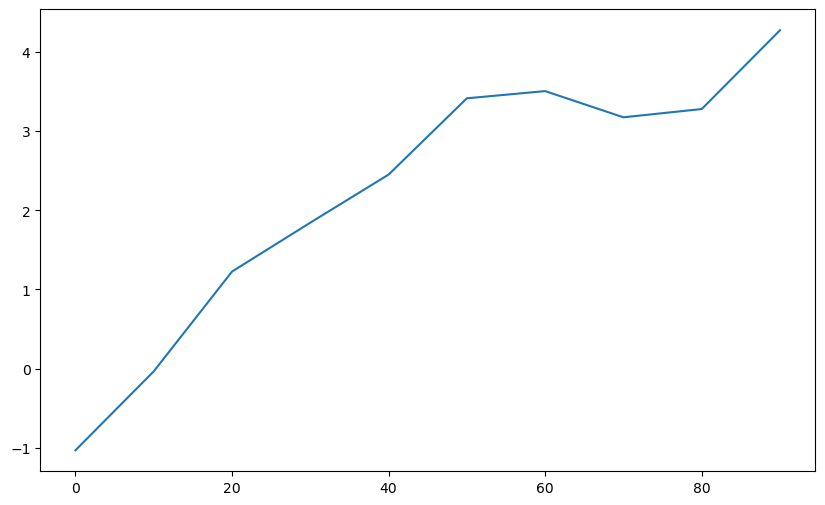

In [18]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

The Series object’s `index` is passed to matplotlib for plotting on the x-axis, though you can disable this by passing `use_index=False`. The x-axis ticks and limits can be adjusted with the `xticks` and `xlim` options, and the y-axis respectively with `yticks` and `ylim`. 

Table 9.3: Series.plot method arguments

Argument|	Description
|:----------|:---------------------------------------------------|
label|	Label for plot legend
ax|	matplotlib subplot object to plot on; if nothing passed, uses active matplotlib subplot
style|	Style string, like "ko--", to be passed to matplotlib
alpha|	The plot fill opacity (from 0 to 1)
kind|	Can be "area", "bar", "barh", "density", "hist", "kde", "line", or "pie"; defaults to "line"
figsize|	Size of the figure object to create
logx|	Pass True for logarithmic scaling on the x axis; pass "sym" for symmetric logarithm that permits negative values
logy|	Pass True for logarithmic scaling on the y axis; pass "sym" for symmetric logarithm that permits negative values
title|	Title to use for the plot
use_index|	Use the object index for tick labels
rot|	Rotation of tick labels (0 through 360)
xticks|	Values to use for x-axis ticks
yticks|	Values to use for y-axis ticks
xlim|	x-axis limits (e.g., [0, 10])
ylim|	y-axis limits
grid|	Display axis grid (off by default)

Most of pandas’s plotting methods accept an optional `ax` parameter, which can be a matplotlib subplot object. This gives you more flexible placement of subplots in a grid layout.

DataFrame’s plot method plots each of its columns as a different line on the same subplot, creating a legend automatically (see Simple DataFrame plot):

<Axes: >

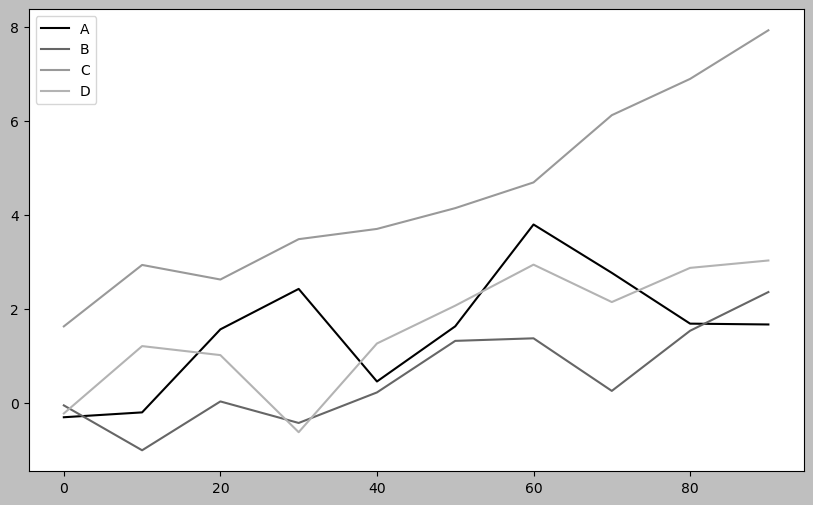

In [19]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
plt.style.use('grayscale') # use grayscale for all plot elements: line, marker, background
# suitable for b&W publication
df.plot()

:::{.callout-note}
`plt.style.use('grayscale')` to switch to a color scheme more suitable for black and white publication, since some readers will not be able to see the full color plots.

The plot attribute contains a "family" of methods for different plot types. For example, `df.plot()` is equivalent to `df.plot.line()`. We'll explore some of these methods next.

:::{.callout-note}
DataFrame has a number of options allowing some flexibility for how the columns are handled, for example, whether to plot them all on the same subplot or to create separate subplots. See Table 9.4 for more on these.

Table 9.4: DataFrame-specific plot arguments
Argument|	Description
|:-------------|:---------------------------------------------|
subplots|	Plot each DataFrame column in a separate subplot
layouts|	2-tuple (rows, columns) providing layout of subplots
sharex|	If subplots=True, share the same x-axis, linking ticks and limits
sharey|	If subplots=True, share the same y-axis
legend|	Add a subplot legend (True by default)
sort_columns|	Plot columns in alphabetical order; by default uses existing column order



### Bar Plots
The `plot.bar()` and `plot.barh()` make vertical and horizontal bar plots, respectively. In this case, the Series or DataFrame index will be used as the x (bar) or y (barh) ticks 

<Axes: >

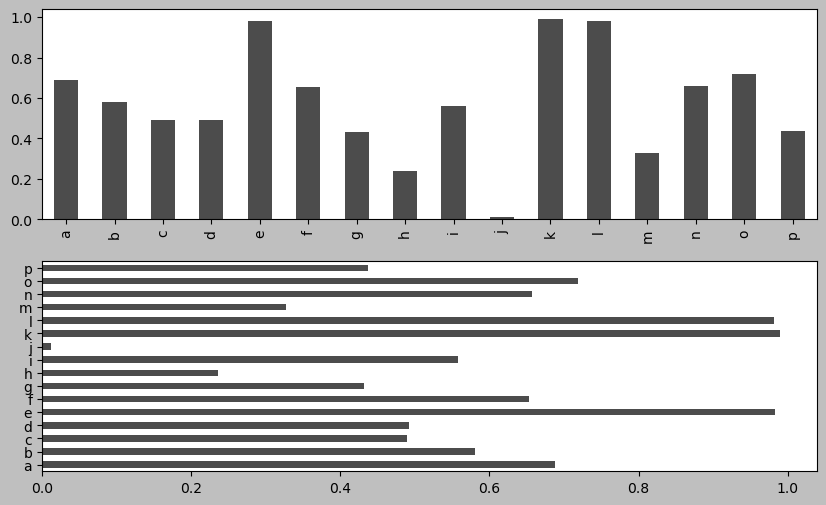

In [20]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)# note the index starting from bottom

In [21]:
np.random.seed(12348)

In [22]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df


Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


<Axes: >

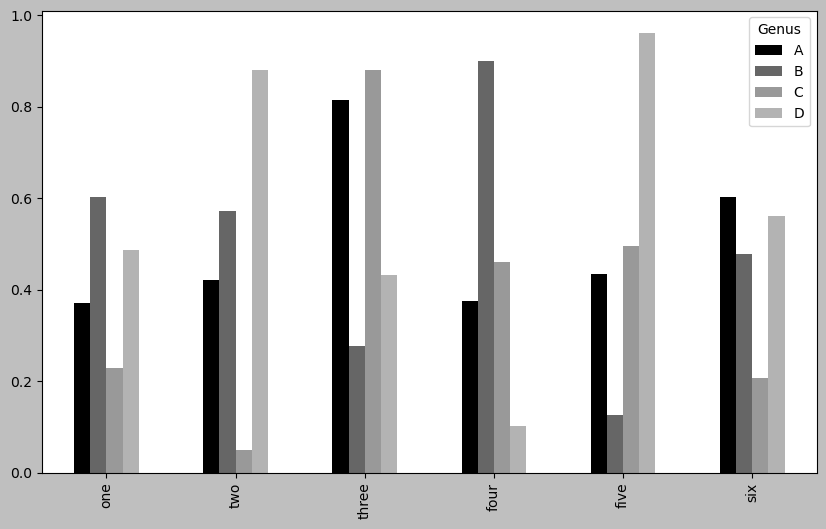

In [23]:
df.plot.bar()

In [24]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Note that the name “Genus” on the DataFrame’s columns is used to title the legend.

We create stacked bar plots from a DataFrame by passing `stacked=True`, resulting in the value in each row being stacked together horizontally

<Axes: >

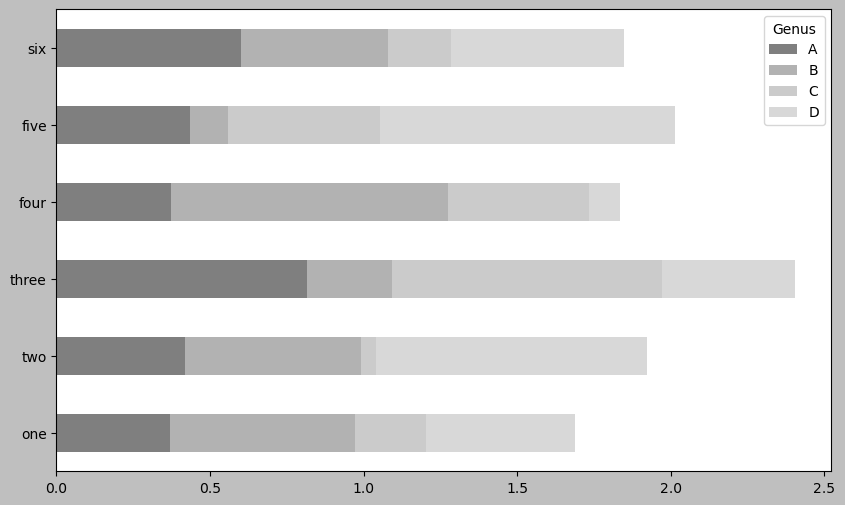

In [25]:
df.plot.barh(stacked=True, alpha=0.5)

In [26]:
plt.close("all")

:::{.callout-note}
A useful recipe for bar plots is to visualize a Series’s value frequency using `value_counts`: `s.value_counts().plot.bar()`.

Let's have a look at an example dataset about restaurant tipping. Suppose we wanted to make a stacked bar plot showing the percentage of data points for each party size for each day. I load the data using read_csv and make a cross-tabulation by day and party size. The `pandas.crosstab` function is a convenient way to compute a simple frequency table from two DataFrame columns:

In [27]:
tips = pd.read_csv("examples/tips.csv")
tips.head()


,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [28]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [29]:
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [30]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [31]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
                              axis="index")
party_pcts


size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


In [32]:
party_pcts.sum(axis=1)

day
Thur    1.0
Fri     1.0
Sat     1.0
Sun     1.0
dtype: float64

<Axes: xlabel='day'>

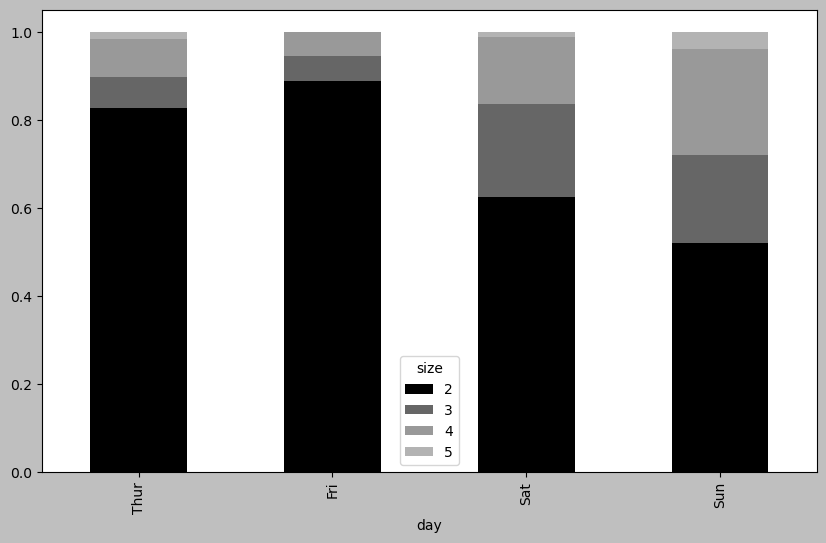

In [33]:
party_pcts.plot.bar(stacked=True)

In [34]:
plt.close("all")

In [35]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [36]:
import seaborn as sns

tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()


,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='tip_pct', ylabel='day'>

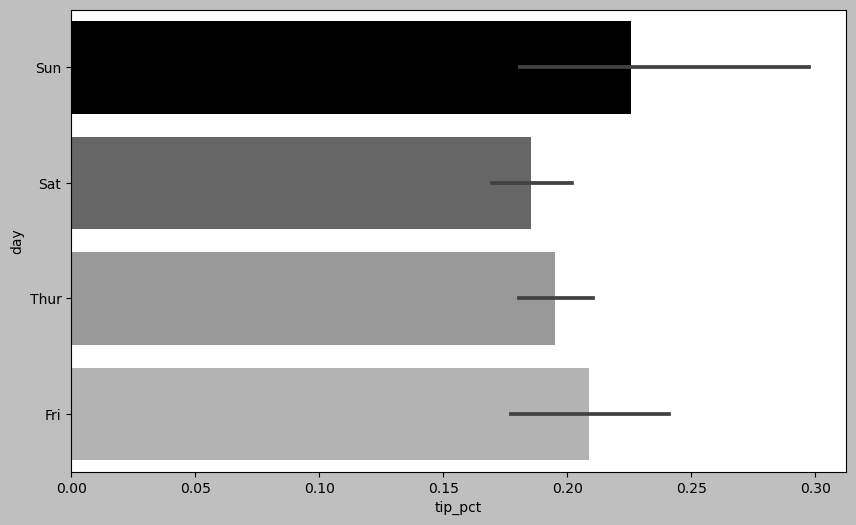

In [37]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

In [38]:
plt.close("all")

c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

<Axes: xlabel='tip_pct', ylabel='day'>

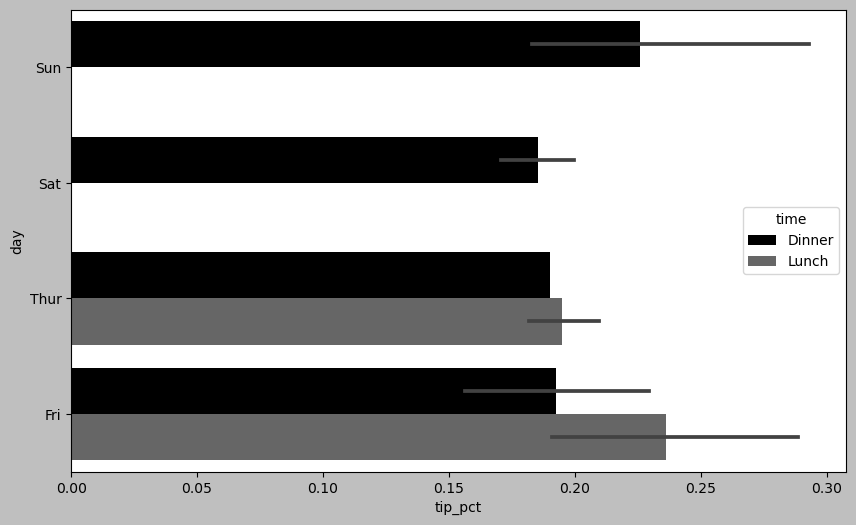

In [39]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

In [40]:
plt.close("all")

Notice that seaborn has automatically changed the aesthetics of plots: the default color palette, plot background, and grid line colors. You can switch between different plot appearances using `seaborn.set_style`. 

When producing plots for black-and-white print medium, you may find it useful to set a greyscale color palette, like so:
```
sns.set_palette("Greys_r")
```

In [41]:
sns.set_style("whitegrid")

### Histograms and Density Plots
using the `plot.hist` method on the Series :

In [42]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='Frequency'>

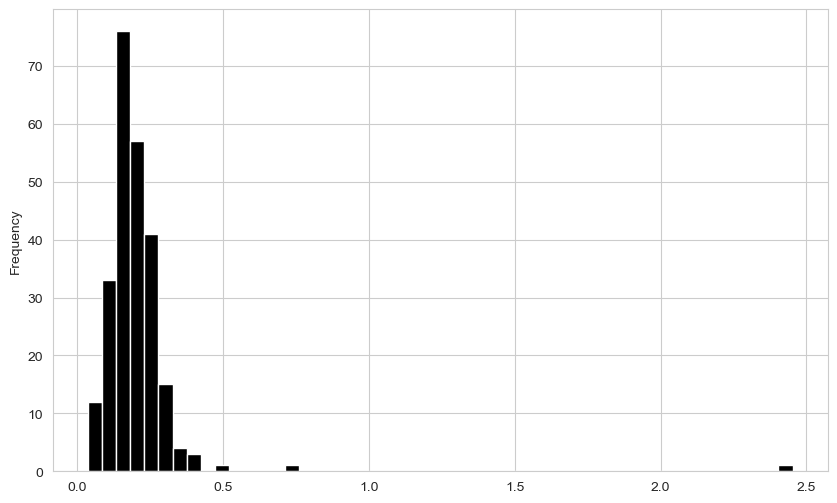

In [43]:
tips["tip_pct"].plot.hist(bins=50)

In [44]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Thus, density plots are also known as kernel density estimate (KDE) plots. Using `plot.density` makes a density plot using the conventional mixture-of-normals estimate 

In [48]:
import scipy

<Axes: ylabel='Density'>

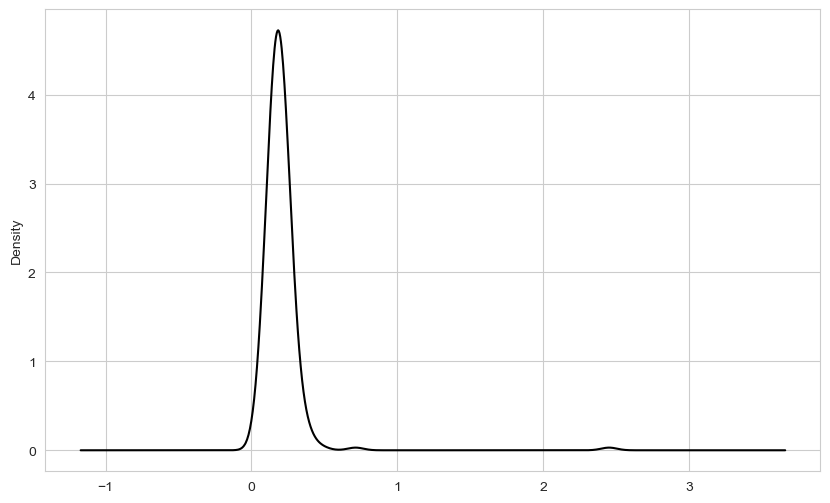

In [49]:
tips["tip_pct"].plot.density() # need scipy package

In [50]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Seaborn makes histograms and density plots even easier through its histplot method, which can plot both a histogram and a continuous density estimate simultaneously. 

In [51]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))
values



0       0.203887
1      -2.213737
2       0.315042
3      -0.137200
4       0.036238
         ...    
395    10.636197
396     9.259458
397    10.182617
398    10.686063
399    10.864287
Length: 400, dtype: float64

c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

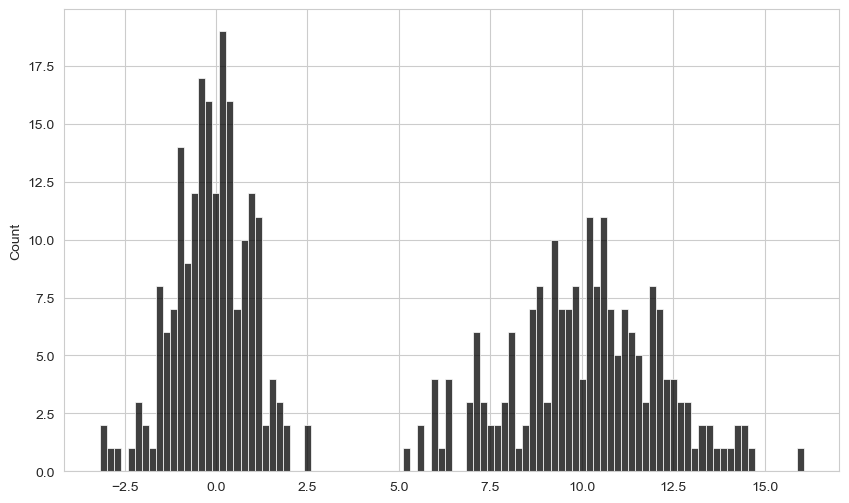

In [ ]:
sns.histplot(values, bins=100, kde=False, color="black")

### Scatter or Point Plots


In [56]:
macro = pd.read_csv("examples/macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
data.head(3)


,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3


In [58]:
np.log(data).head(3)

,cpi,m1,tbilrate,unemp
0,3.366606,4.939497,1.036737,1.757858
1,3.372455,4.953712,1.124930,1.629241
2,3.379293,4.945207,1.340250,1.667707


In [59]:
np.log(data).diff().head(3)

,cpi,m1,tbilrate,unemp
0,NaN,NaN,NaN,NaN
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466


In [60]:
trans_data = np.log(data).diff().dropna()
trans_data.head(3)

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060


In [61]:

trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [62]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

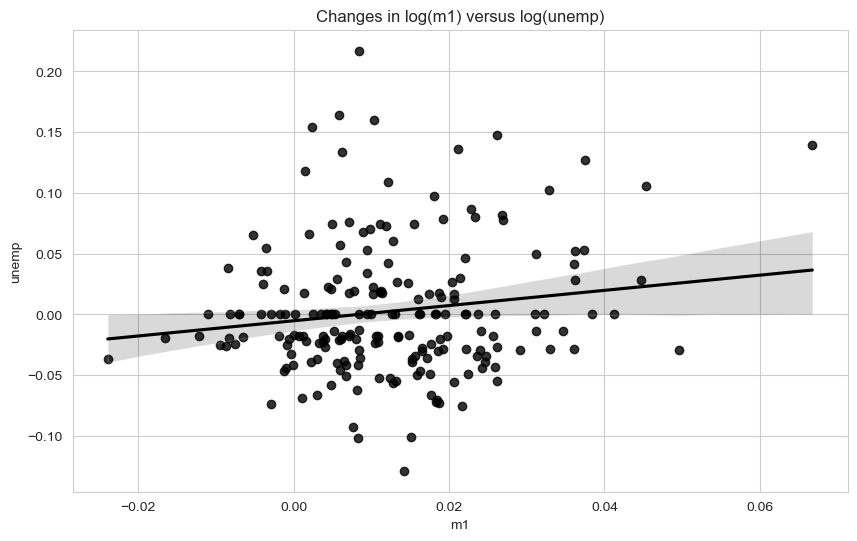

In [63]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")

In exploratory data analysis, it’s helpful to be able to look at all the scatter plots among a group of variables; this is known as a pairs plot or `scatter plot matrix`. Making such a plot from scratch is a bit of work, so seaborn has a convenient `pairplot` function that supports placing histograms or density estimates of each variable along the diagonal:

c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

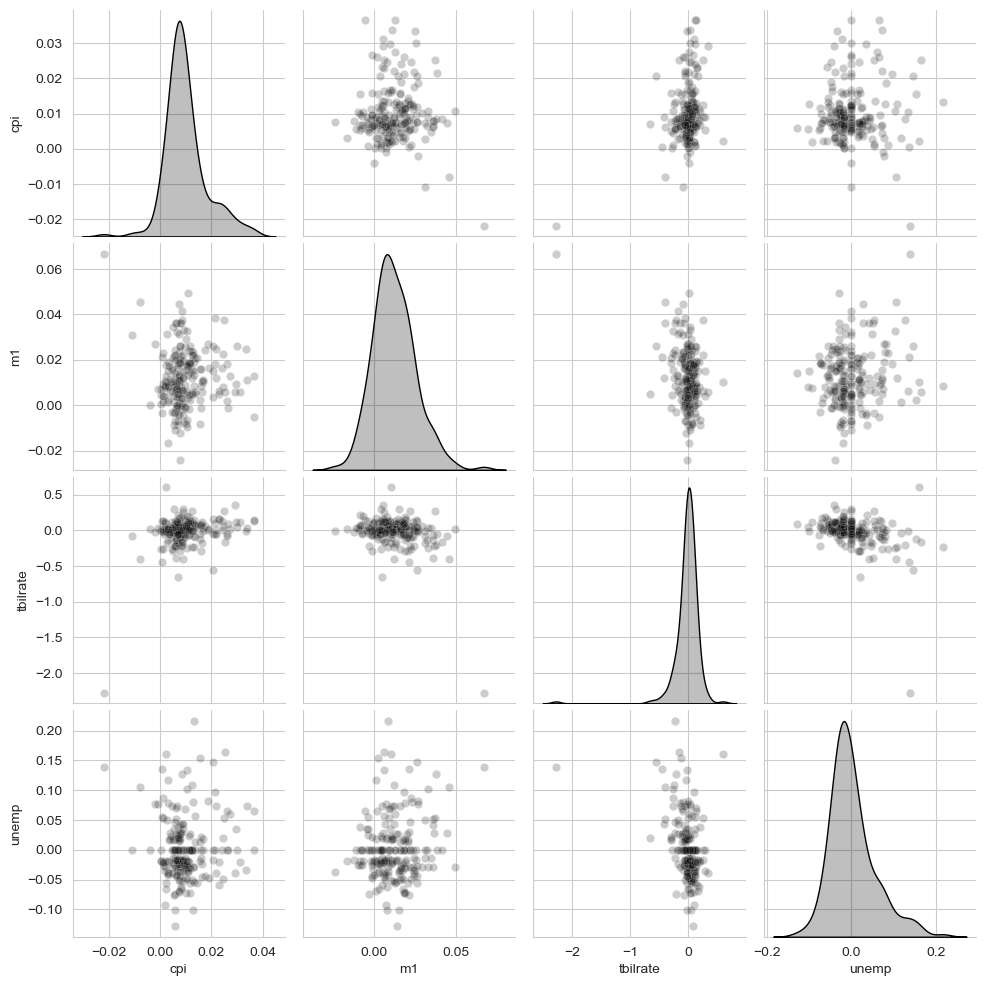

In [66]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2}) #data points transparency is 0.2. 0(transparent)<=alpha<=1(opaque)

### Facet Grids and Categorical Data
 seaborn has a useful built-in function `catplot` that simplifies making many kinds of faceted plots split by categorical variables 

c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

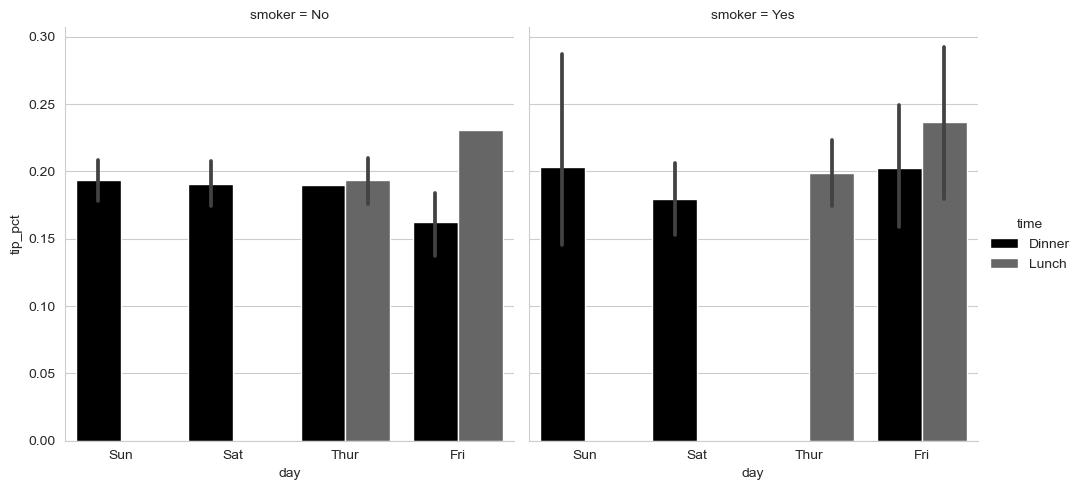

In [67]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",  # facet by "smoker"
            kind="bar", data=tips[tips.tip_pct < 1])

c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

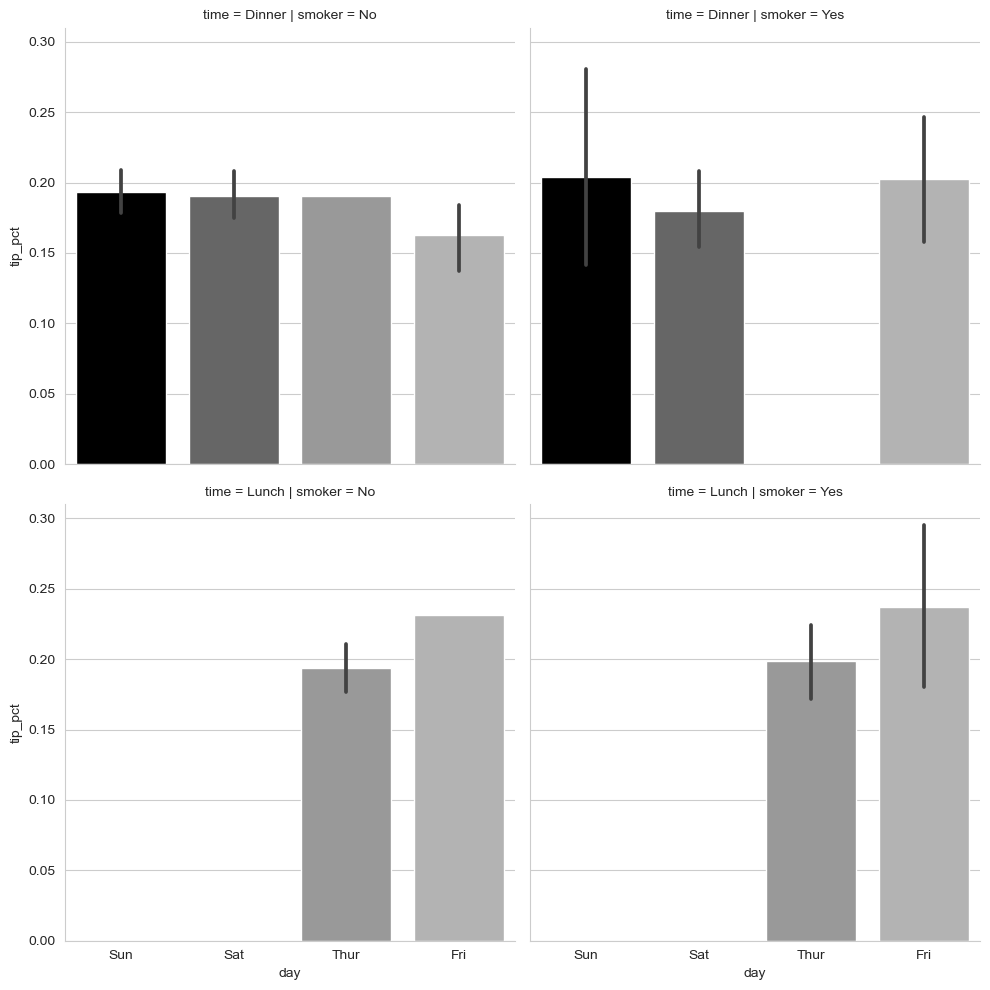

In [68]:
sns.catplot(x="day", y="tip_pct", row="time",
            col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

`catplot` supports other plot types that may be useful depending on what you are trying to display. For example, box plots (which show the median, quartiles, and outliers) can be an effective visualization type

c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

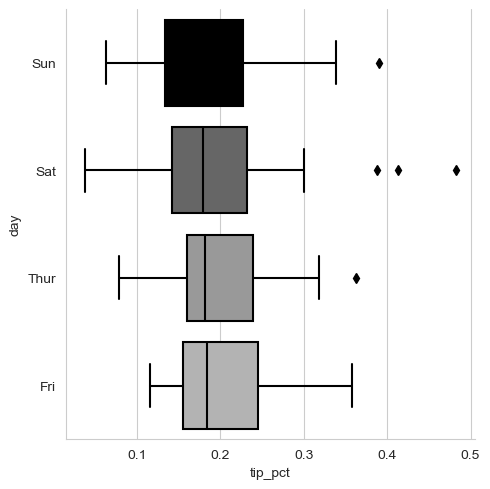

In [69]:
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips.tip_pct < 0.5])

You can create your own facet grid plots using the more general `seaborn.FacetGrid` class.

In [56]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS